[Versión Interactiva](https://hub.gke2.mybinder.org/user/juandadamo-clases_fiuba-rigbdjfb/notebooks/6731/introduccion-para-tcym.ipynb)

 ## Conducción No Estacionaria

Recordemos la ecuación general de conducción:

$$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T $$

Intentaremos dar una introducción breve al poder de cálculo que se dispone con Python numérico a través de la resolución de problemas simples de transferencia de calor. Tendremos acceso a herramientas para el análisis de las soluciones, cambiando fácilmente condiciones de borde, iniciales o parámetros.

##### Formato de las 'notebook'

-  Noten que hay distintos tipos de celdas posibles: 'markdown' permite. introducir texto mientras que ' code' es un entorno python, donde definimos  constantes, variables, funciones, etc

- Las celdas 'code' pueden ejecutarse mediante interfase gráfica (botones ) o bien presionando
 'Shift+Enter'.
 
 -Las figuras son interactivas y a su vez pueden definirse por código las escalas, regiones que nos interese mostrar.

### 1) Modelo de sólido semi-infinito
Recordemos que la solución para el problema 1D donde la condición de borde en $x=0$ es de tipo Dirichlet. Si $T(x=0)=T_s = T_0+\Delta T$, la solución analítica resulta: 
$$ T = T_0 + \Delta T \text{erfc} \left (\frac{x}{2\sqrt(\alpha t)} \right )$$
donde erfc es la función error complemento. 

In [2]:
!pip install ht matplotlib numpy scipy

In [3]:
# Definimos el tipo de documento, "matplotlib notebook"
# Importamos las librerías necesarias: numpy para los cálculos, 
# matplotlib para los gráficos.
# como la función erfc no está incluida en numpy, debe importarse desde otra librería
#%matplotlib notebook
%matplotlib inline
import ht as ht
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14;
mpl.rcParams['ytick.labelsize'] = 14;
mpl.rcParams['font.family'] = 'serif';

In [4]:
# Función 
def Dirichlet1(T0,dT,t,x,alpha):
    T = T0 + dT*erfc(abs(x)/(2.*np.sqrt(alpha*t)))
    return T

##### Pruebas

Podemos hacer una figura a partir de esta función. Podemos cambiar parámetros, temperatura inicial $T_0$, cambio de temperatura $dT$, el tiempo $t$ y la distancia $x$ a la superficie. Podemos observar como influyen en el problema de difusión  dimensional.

In [5]:
### Cambios

# Condiciones y parámetros
T0 = 0.2             # Temperatura inicial
dT = 15.                      # Cambio de temperatura
t1 = 10.                       # Tiempo
t2 = 1000.                        # Tiempo 2  
xs = np.arange(0,0.10,0.001)    # Distancias
alpha_m = 9.19e-8              # Difusividad térmica. Pej, madera de pino

#########################################################################################

# Ejecuta la función
T = Dirichlet1(T0,dT,t1,xs,alpha_m)
T2 = Dirichlet1(T0,dT,t2,xs,alpha_m)





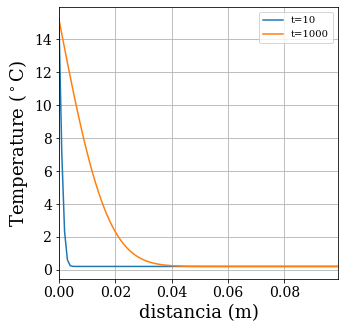

In [6]:
fig0,ax0 = plt.subplots(1);
# Gráfico. Definimos una figura fig0 y sus ejes ax0

fig0.set_size_inches((5,5));  #tamaño de la figura
ax0.plot(xs,T,label='t=%.0f'%t1)  # plot sobre los ejes
ax0.plot(xs,T2,label='t=%.0f'%t2)
ax0.set_xlim([min(xs),max(xs)]);#definimos límites
ax0.set_xlabel('distancia (m)',fontsize=18); #nombre para ordenadas
ax0.set_ylabel('Temperature ($^\circ$C)',fontsize=18); #nombre para abcisas
ax0.grid(True); #grilla de coordenadas
ax0.legend()

### 2) Forzado armónico

Para la condición de temperatura en la superficie que cambia en forma armónica con el tiempo,
es decir:
Surface temperature in time:
$$ T(0,t) = T_0 + T_a \sin(2\pi \omega t) $$

sabemos que la solución para tiempos *largos* es:

$$ T(x,t) = T_0 + T_a exp \left ( -x \sqrt(\frac{\pi \omega}{\alpha}) \right ) \sin \left (2 \pi \omega t - x \sqrt(\frac{\pi \omega}{\alpha}) \right ) $$





In [7]:

# función armónica en la superficie
def Dirichlet_armonica(T0,Ta,t,x,omega,alpha=1e-6):

    T = T0 + Ta * np.exp(-x*np.sqrt(np.pi*omega/(alpha))) * np.sin((2.*np.pi*omega*t)-x*np.sqrt(np.pi*omega/(alpha)))
    return T

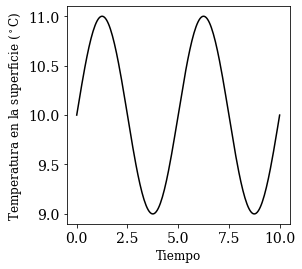

In [8]:
# Constantes y parámetros
T0 = 10.                      # temperatura media
Ta = 1.                       # amplitud de la variación de temperatura
ts = np.linspace(0,1e1,200)   # tiempo
xs = np.arange(0,40e-3,1e-4)  # distancias
omega = 0.2                   # frecuencia (2 pi freq)
alpha_l = 1.5e-5              #difusividad térmica del latón
n_profiles = 5                # número de perfiles a plotear

#########################################################################################


fig1,ax1 = plt.subplots(1)
# Graficamos la condición de borde
fig1.set_size_inches((4,4))
#plt.title(r'Condición de borde')
ax1.plot(ts,T0+Ta*np.sin(2.*np.pi*omega*ts),'k');
ax1.set_ylabel('Temperatura en la superficie ($^\circ$C)',fontsize=12)
ax1.set_xlabel('Tiempo',fontsize=12);
#plt.tight_layout()


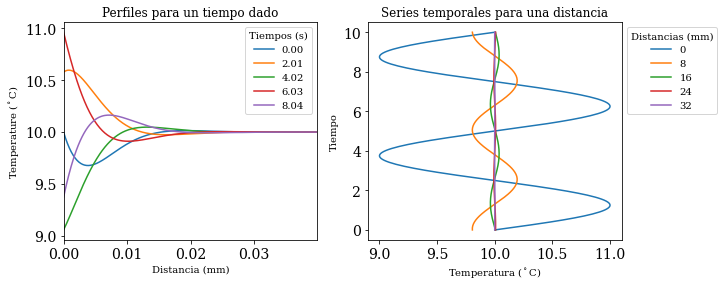

In [9]:
fig2,ax2 = plt.subplots(1,2,figsize=(10,4));
# Genera un loop para realizar los n perfiles
for t in ts[::len(ts)//n_profiles]:
    # evalúa la función
    T = Dirichlet_armonica(T0,Ta,t,xs,omega,alpha_l)
    # Plot
    ax2[0].plot(xs,T,label='%.2f'%(t))
    
ax2[0].legend(title='Tiempos (s)')
ax2[0].set_xlabel('Distancia (mm)');
ax2[0].set_ylabel('Temperature ($^\circ$C)');
ax2[0].set_xlim([min(xs),max(xs)]);
ax2[0].set_title('Perfiles para un tiempo dado')


# Gráfico de las series temporales

for x in xs[::len(xs)//n_profiles]:
    T = Dirichlet_armonica(T0,Ta,ts,x,omega,alpha_l)
    # Plot
    ax2[1].plot(T,ts,label='%0d'%(x*1000))
    
ax2[1].legend(title='Distancias (mm)',bbox_to_anchor=(1, 1))
ax2[1].set_xlabel('Temperatura ($^\circ$C)');
ax2[1].set_ylabel('Tiempo');
ax2[1].set_title('Series temporales para una distancia');


#### Un ejemplo simple de utilización de la librería ht

Acceso a propiedades de materiales

In [10]:
madera = ht.nearest_material('wood')
acero = ht.nearest_material('steel')

print('El coeficiente de conducción de la madera es %.3f W/m K'%ht.k_material(madera))
print('El coeficiente de conducción del acero es %.3f W/ m K'%ht.k_material(acero))
a_madera = ht.k_material(madera)/(ht.rho_material(madera)*ht.Cp_material(madera))
a_acero = ht.k_material(acero)/(ht.rho_material(acero)*ht.Cp_material(acero))
print('La difusividad térmica de la madera es %.2g m2/s'%a_madera)
print('La difusividad térmica del acero es %.2g m2/s'%a_acero)

El coeficiente de conducción de la madera es 0.115 W/m K
El coeficiente de conducción del acero es 50.000 W/ m K
La difusividad térmica de la madera es 1.7e-07 m2/s
La difusividad térmica del acero es 1.4e-05 m2/s
